# <center> Workshop - Analysis in MDAnalysis</center>


In [1]:
import warnings
warnings.filterwarnings("ignore") 

# plotting
import matplotlib.pyplot as plt

# First we import MDAnalysis
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
u = mda.Universe(PSF, DCD)

/Users/ugmhackathon/mambaforge/envs/mda_workshop/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


# Existing analyses

https://userguide.mdanalysis.org/stable/examples/analysis/README.html#

- **Alignment and RMS Fitting**

- **Distances and Contacts**

- **Trajectory Similarity**

- **Structural Analysis**

- **Structure**

- **Volumetric analyses**

- **Dimension reduction**

- **Polymers and membranes**

- **Hydrogen Bond Analysis**

## Root Mean Square Deviation

In [3]:
from MDAnalysis.analysis import rms
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
)
R.run()

In [4]:
print(R.results.rmsd[:3])

[[0.00000000e+00 9.99999912e-01 5.83434382e-07]
 [1.00000000e+00 1.99999982e+00 4.63659217e-01]
 [2.00000000e+00 2.99999974e+00 6.41933990e-01]]


Text(0, 0.5, 'RMSD')

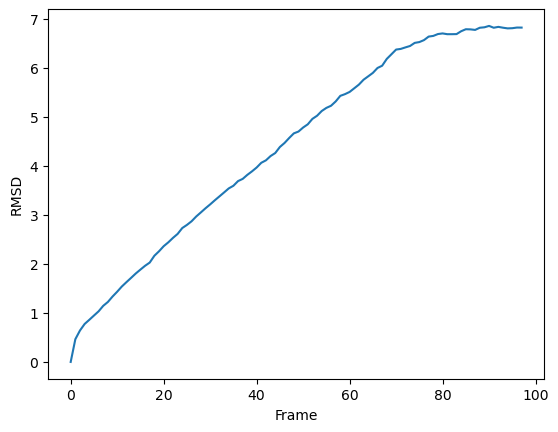

In [5]:
plt.plot(R.results.rmsd.T[0], R.results.rmsd.T[2])
plt.xlabel('Frame')
plt.ylabel('RMSD')

Let's see how it is created

https://github.com/MDAnalysis/mdanalysis/blob/develop/package/MDAnalysis/analysis/rms.py

```python
class RMSD(AnalysisBase):
    def __init__(self, ...):
        # set parameters
        super().__init__(universe.trajectory,
                         **kwargs)
        ...
    def _prepare(self):
        # called before iteration on the trajectory has begun.
        self.results.rmsd = np.zeros(...)
        ...
    def _single_frame(self):
        # called after the trajectory is moved onto each new frame.
        self.results.rmsd[self._frame_index] = rmsd(...)
        ...
```

**`AnalysisBase` handles all the heavy-lifting of iteration**

https://github.com/MDAnalysis/mdanalysis/blob/develop/package/MDAnalysis/analysis/base.py#L223

```python
class AnalysisBase:
   ...
   def run(self, start, stop, step, ...):
        self._setup_frames()
        self._prepare()
        for ts in self.trajectory:
            self._single_frame()
        self._conclude()
        return self
```

## More on RMSD options

In [6]:
rms.RMSD?

Init signature:
rms.RMSD(
    atomgroup,
    reference=None,
    select='all',
    groupselections=None,
    weights=None,
    weights_groupselections=False,
    tol_mass=0.1,
    ref_frame=0,
    **kwargs,
)
Docstring:     
Class to perform RMSD analysis on a trajectory.

The RMSD will be computed for two groups of atoms and all frames in the
trajectory belonging to `atomgroup`. The groups of atoms are obtained by
applying the selection selection `select` to the changing `atomgroup` and
the fixed `reference`.

Note
----
If you use trajectory data from simulations performed under **periodic
boundary conditions** then you *must make your molecules whole* before
performing RMSD calculations so that the centers of mass of the selected
and reference structure are properly superimposed.


Run the analysis with :meth:`RMSD.run`, which stores the results
in the array :attr:`RMSD.results.rmsd`.


.. versionchanged:: 1.0.0
   ``save()`` method was removed, use ``np.savetxt()`` on
   :attr:`RMSD

**As trajectory progresses, objects e.g. `Atomgroup` will switch their states/properties.**

In [7]:
atom_1 = u.atoms[0]
for ts in u.trajectory[:3]:
    print(ts)
    print(atom_1.position)

< Timestep 0 >
[ 11.736044   8.500797 -10.445281]
< Timestep 1 >
[ 11.505546   8.062977 -10.38611 ]
< Timestep 2 >
[ 11.694641   8.390831 -10.681395]


It helps to write a timestep-agnostic `_single_frame`. But also keep in mind that when you need atom positions that don't change for each frame (e.g. a reference), you should convert them into an array!

# A summary of Lecture 3
- extensive analysis modules maintained in MDAnalysis
- `AnalysisBase` automatically sets up your trajectory reader for iterating
- `AtomGroup` will switch its state during iteration 

## Now - on to the third tutorial!

Find the tutorial notebook `Tutorial3_Analysis` under: 

https://github.com/MDAnalysis/MDAnalysisMolSSIWorkshop-Intermediate2Day/blob/jun24-ws/notebooks/Tutorial3_Analysis.ipynb

**Remember:**
- Go at your own pace!
- Ask questions!
- Take breaks!
- Don't be afraid to read documentation (and source code)